## My fist project with openCV

In [1]:
import cv2
#import google colab function to show image,'cv2.imshow' doesn´t work in google colab
from google.colab.patches import cv2_imshow

In [4]:
cv2.__version__

'4.1.2'

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [119]:
image = cv2.imread('/content/drive/My Drive/cv2_project/Foto.jpg')

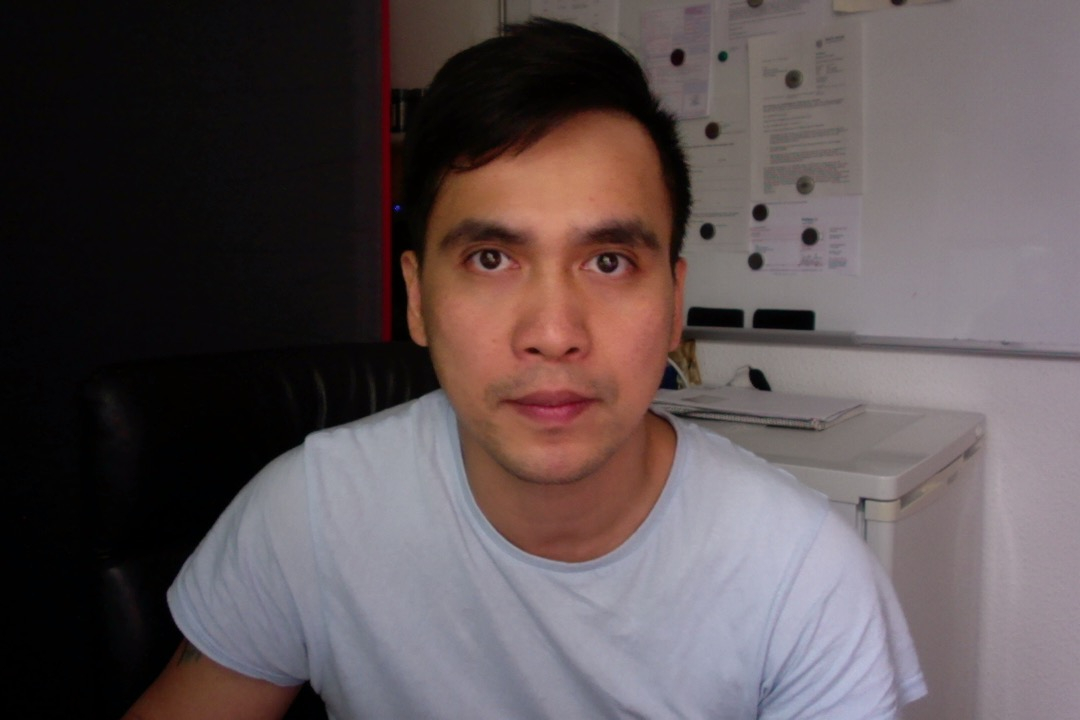

In [105]:
cv2_imshow(image)

In [120]:
#convert to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

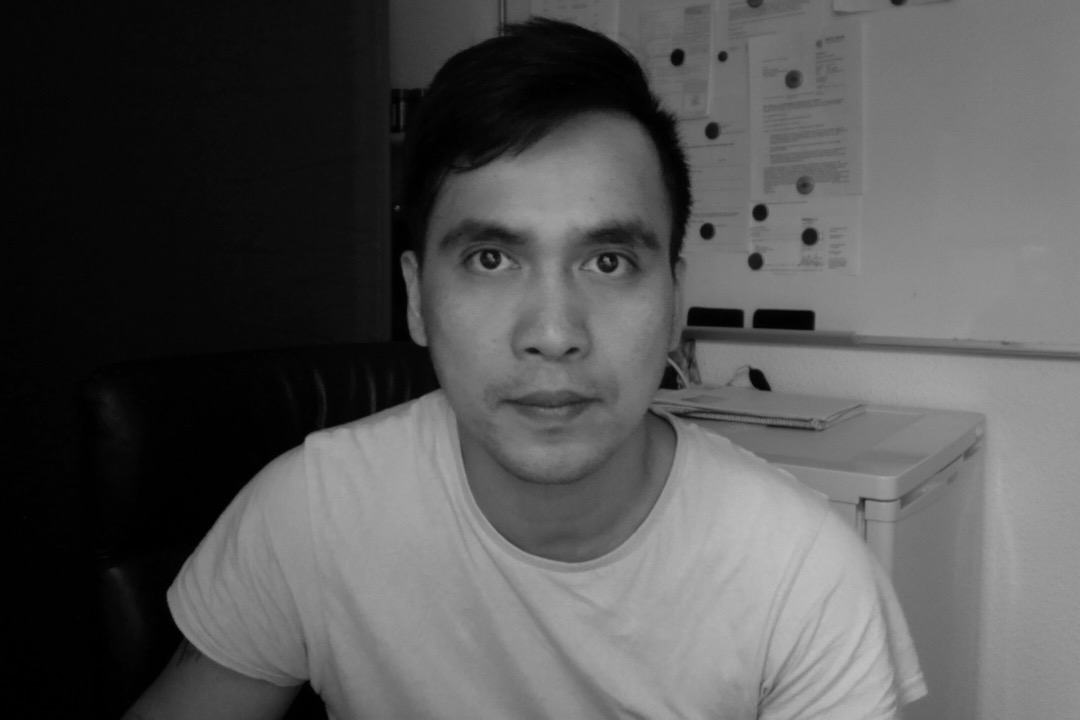

In [107]:
cv2_imshow(gray_image)

### Edge detection

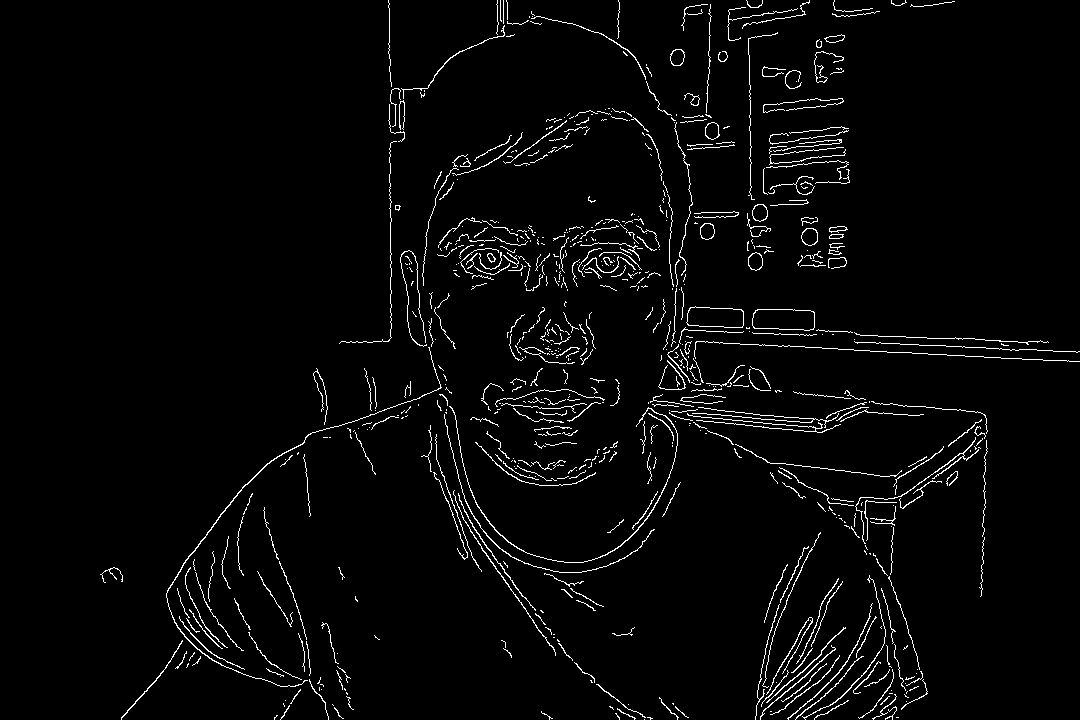

In [14]:
#blur image with GaussianBlur bevor actual edge detection
blurred_image = cv2.GaussianBlur(gray_image, (7,7), 0)
#canny with low threshold
canny = cv2.Canny(blurred_image, 10, 30)
cv2_imshow(canny)

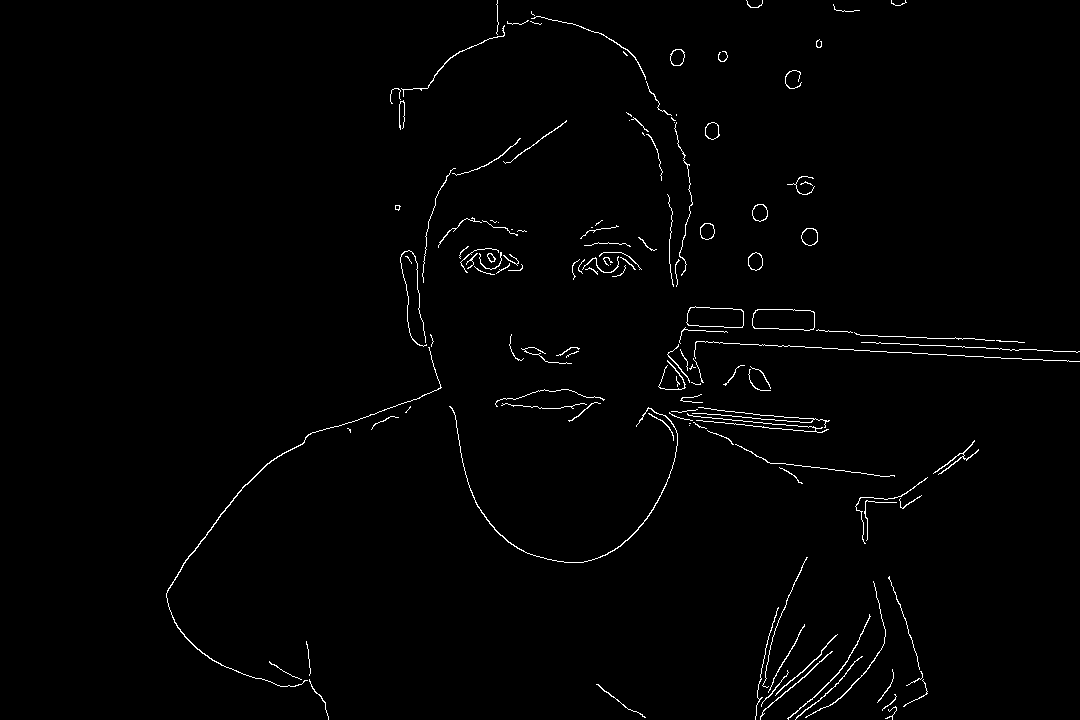

In [20]:
#canny with high threshold
canny2 = cv2.Canny(blurred_image, 30,70)
cv2_imshow(canny2)

## use embedded haarcascade for object detection

In [108]:
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')

In [109]:
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

In [110]:
face = face_cascade.detectMultiScale(
    gray_image,
    scaleFactor = 1.2,
    minNeighbors = 5,
    minSize = (30,30)
    )

In [111]:
print("Found {0} face!".format(len(face)))

Found 1 face!


In [123]:
# draw rectangle around faces detected
for (x,y,w,h) in face:
    cv2.rectangle(image,(x,y),(x+w,y+h),(255,0,0),3)
    gray = gray_image[y:y+h, x:x+w]
    color = image[y:y+h, x:x+w]

In [113]:
eyes = eye_cascade.detectMultiScale(
    gray,
    scaleFactor = 1.2,
    minNeighbors = 5,
    minSize = (10,10)
    )

In [114]:
print("Found {0} eyes!".format(len(eyes)))

Found 2 eyes!


In [125]:
# draw rectangle when detecting eyes 
for (ex,ey,ew,eh) in eyes:
            cv2.rectangle(color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)

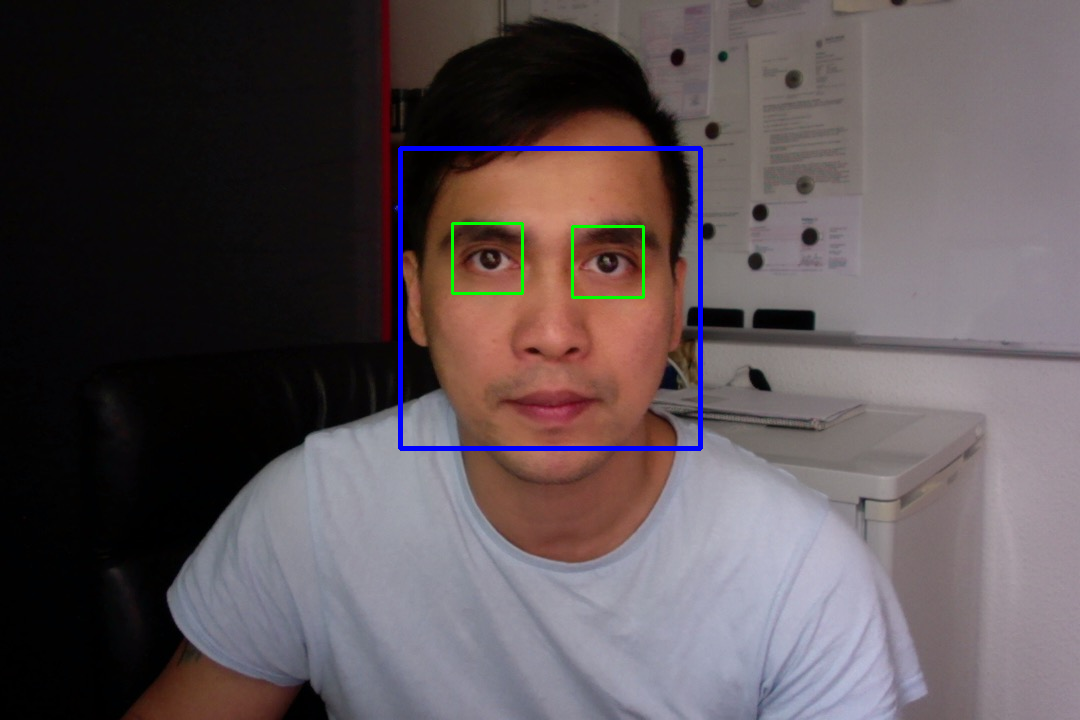

In [126]:
cv2_imshow(image)

## to be continue...